<center>
    
# [Компьютерное зрение](https://cogmodel.mipt.ru/wiki/index.php/%D0%9A%D0%BE%D0%BC%D0%BF%D1%8C%D1%8E%D1%82%D0%B5%D1%80%D0%BD%D0%BE%D0%B5_%D0%B7%D1%80%D0%B5%D0%BD%D0%B8%D0%B5)

## <center> Семинар 2 - Цветовые пространства, гистограммы изображений, интегральные изображения

<a target="_blank" href="https://colab.research.google.com/github/alexmelekhin/cv_course_2023/blob/main/seminars/seminar_02/Seminar_2.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

***

Источник используемого аэрофотоснимка: https://sovzond.ru/upload/medialibrary/267/%D0%98%D1%81%D1%85%D0%BE%D0%B4%D0%BD%D1%8B%D0%B9-%D0%B0%D1%8D%D1%80%D0%BE%D1%84%D0%BE%D1%82%D0%BE%D1%81%D0%BD%D0%B8%D0%BC%D0%BE%D0%BA.jpg

In [364]:
from pathlib import Path

import cv2
import numpy as np

import matplotlib.pyplot as plt

In [365]:
IMG_PATH = "data/aerial_image.jpg"

if not Path(IMG_PATH).exists():
    !git clone https://github.com/alexmelekhin/cv_course_2023.git
    !mv cv_course_2023/seminars/seminar_02/data .

# Цветовые пространства

Наиболее распространенным представлением цвета пикселя является пространство RGB. В таком представлении цвет представлен тремя числами: интенсивностями красного, зеленого и синего базисных цветов.

In [366]:
img = cv2.imread(IMG_PATH)

In [367]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

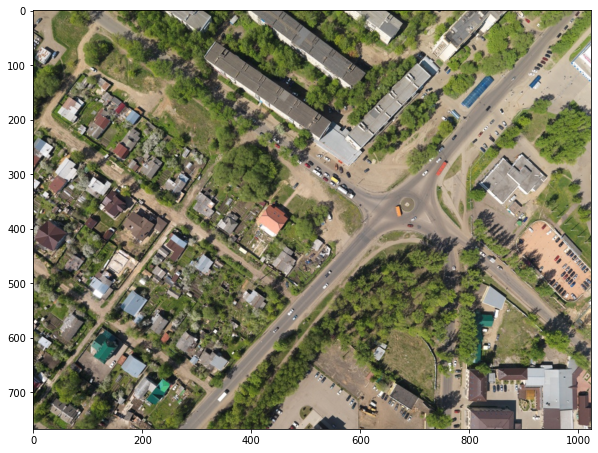

In [368]:
plt.figure(figsize=[10, 10])
plt.imshow(img_rgb)

cvtColor поддерживает конвертацию между множеством других цветовых схем. К примеру, чтобы получить серое изобаржение из цветного достаточно:

In [369]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

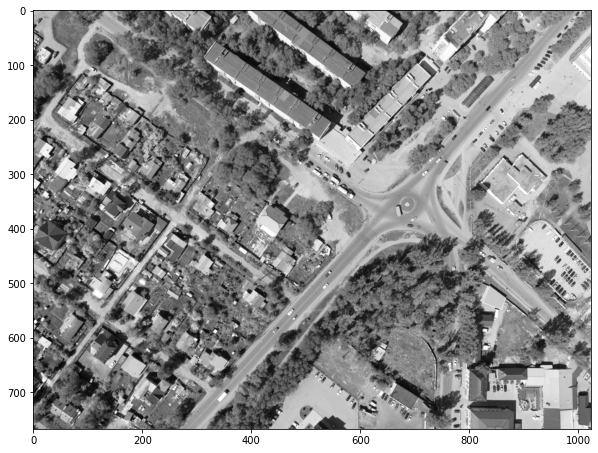

In [370]:
plt.figure(figsize=[10, 10])
plt.imshow(img_gray, cmap='Greys_r')

Если не предполагается использовать информацию о цвете пикселей, то можно сразу загрузить изображение в оттенках серого:

In [371]:
img_gray = cv2.imread(IMG_PATH, cv2.IMREAD_GRAYSCALE)

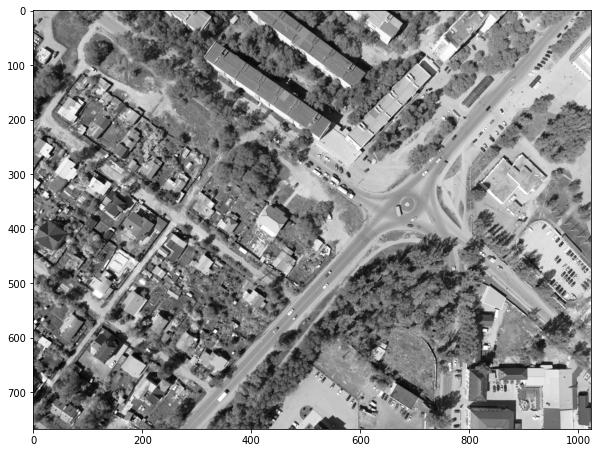

In [372]:
plt.figure(figsize=[10, 10])
plt.imshow(img_gray, cmap='Greys_r')

серое изображение - двумерный массив:

In [373]:
print('type(img_gray) = ', type(img_gray))
print('img_gray.shape = ', img_gray.shape)
print('img_gray.dtype = ', img_gray.dtype)

type(img_gray) =  <class 'numpy.ndarray'>
img_gray.shape =  (768, 1024)
img_gray.dtype =  uint8


## Упражнение 1: RGB $\to$ gray

Реализуйте функцию преобразования цветного изображения в формате RGB в серое

In [374]:
def convert_rgb_to_grayscale(img_rgb):
    img = img_rgb.astype(np.float32) / 255.0

    # Compute the luminosity of each pixel using the formula Y' = 0.299 R + 0.587 G + 0.114 B
    luminosity = 0.299 * img[:,:,0] + 0.587 * img[:,:,1] + 0.114 * img[:,:,2]
    
    # Scale the luminosity to the range [0, 255] and convert to uint8
    grayscale = np.round(luminosity * 255.0).astype(np.uint8)
    
    return grayscale
    

In [375]:
assert((cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY) == convert_rgb_to_grayscale(img_rgb)).all())

## Вопрос 1
Почему бы не использовать при преобразовании в серое просто среднее арифметическое?

**Ответ:не передаст тональность, например, синий(0, 0, 255) == зеленый(0, 255, 0) == красный(255, 0, 0)**

Кроме RGB/BGR и grayscale существуют и другие цветовые представления. Преобразования между ними можно осуществлять с помощью библиотеки OpenCV следующим способом:

### RGB $\to$ HSV

In [376]:
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

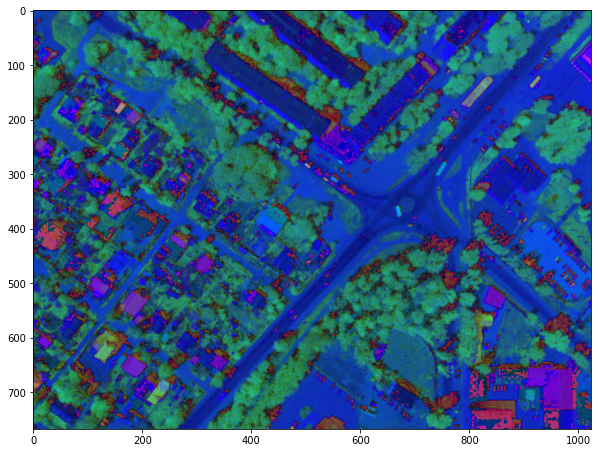

In [377]:
plt.figure(figsize=[10, 10])
plt.imshow(img_hsv)

### RGB $\to$ YUV

In [378]:
img_yuv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YUV)

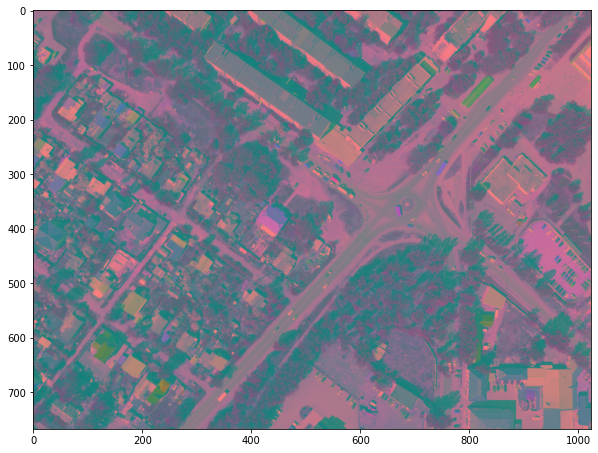

In [379]:
plt.figure(figsize=[10, 10])
plt.imshow(img_yuv)

## Упражнение 2
Попробуйте другие цветовые пространства, конвертация в которые реализована в OpenCV.

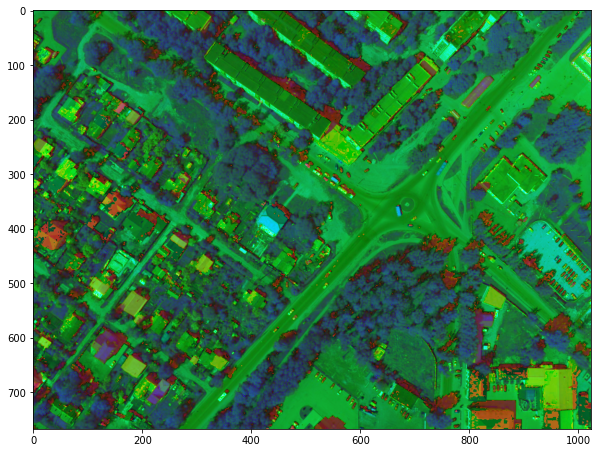

In [380]:
img_hls = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HLS)
plt.figure(figsize=[10, 10])
plt.imshow(img_hls)

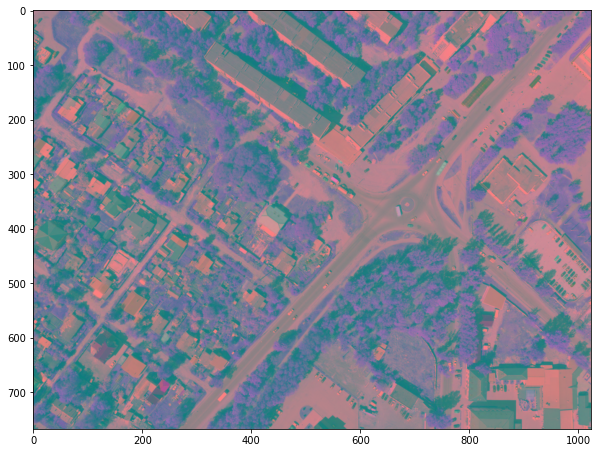

In [381]:
img_lab = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2LAB)
plt.figure(figsize=[10, 10])
plt.imshow(img_lab)

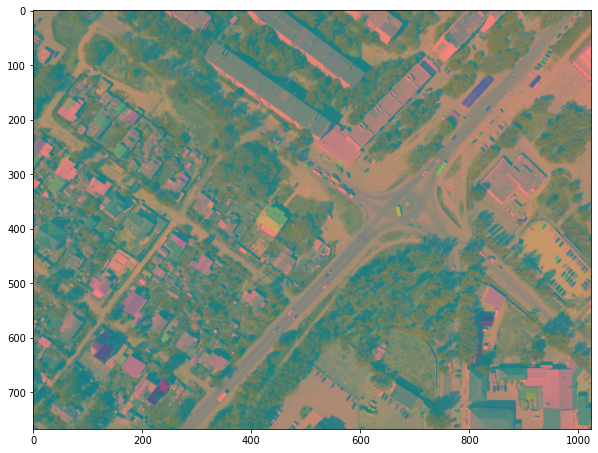

In [382]:
img_555 = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YCrCb)
plt.figure(figsize=[10, 10])
plt.imshow(img_555)

## Упражнение 3: RGB $\to$ HSV

Реализуйте самостоятельно конвертацию из RGB в HSV и сравните её с реализацией в OpenCV.


In [383]:

def rgb_to_hsv(rgb_image):
    # Convert RGB image to float values in range 0-1
    rgb_image = rgb_image.astype(np.float32) / 255.0
    
    # Split RGB channels
    r, g, b = rgb_image[:, :, 0], rgb_image[:, :, 1], rgb_image[:, :, 2]
    
    # Compute value/brightness channel
    v = np.max(rgb_image, axis=2)
    
    # Compute saturation channel
    s = np.zeros_like(v)
    mask = (v > 0)
    delta = np.zeros_like(v)
    delta[mask] = np.max(rgb_image, axis=2)[mask] - np.min(rgb_image, axis=2)[mask]
    s[mask] = delta[mask] / v[mask]
    
    # Compute hue channel
    h = np.zeros_like(v)
    mask = (delta > 0)
    mask1 = (v == r)
    mask2 = (v == g)
    mask3 = (v == b)
    h[mask & mask1] = ((g - b)[mask & mask1] / delta[mask & mask1]) % 6
    h[mask & mask2] = (b - r)[mask & mask2] / delta[mask & mask2] + 2
    h[mask & mask3] = (r - g)[mask & mask3] / delta[mask & mask3] + 4
    h[mask] *= 60
    h = np.round(h / 2).astype(np.uint8)
    
    # Stack HSV channels and convert to float values in range 0-1

    s *= 255
    v *= 255
    hsv_image = np.stack((h, s, v), axis=2).astype(np.float32)
    hsv_image = np.round(hsv_image)
    hsv_image = np.array(hsv_image, dtype=np.uint8)
    # 
    
    return hsv_image

In [384]:
# assert((rgb_to_hsv(img_rgb) == cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)).all())

## Вопрос 2

В каких задачах переход из RGB в другое цветовое пространство может быть полезным?

**Ответ: выделение по цвету объекта**

# Гистограмма изображения

Напомним, что гистограммой изображения называется функция, показыващая количество пикселей изображения с заданным в качестве аргумента значением интенсивности:

$$
    h(v) = \sum_{x = 0}^{W - 1} \sum_{y = 0}^{H - 1} [f(x, y) = v] 
$$

Если дополнительно потребовать, чтобы $\sum_{v = 0}^{255} h(v) = 1$, то $h$ будет представлять функцию плотности распределения интенсивности на изображении.

Определим вспомогательную функцию, позволяющую визализировать гистограмму:

In [385]:
def visualize_hist(hist):
    plt.figure(figsize=[20, 5])
    plt.bar(np.arange(len(hist)), hist / hist.sum())

Рассчитать гистограмму можно с помощью встроенной функции OpenCV:

In [386]:
hist_cv = cv2.calcHist([img_gray],      # список изображений
                       [0],             # список каналов
                       None,            # маска (без маски)
                       [256],           # размер гистограммы
                       [0, 256])[:, 0]  # диапазон значений

Результат представляет собой обычный массив длины 256:

In [387]:
print('hist_cv.shape = ', hist_cv.shape)

hist_cv.shape =  (256,)


и выглядит следующим образом:

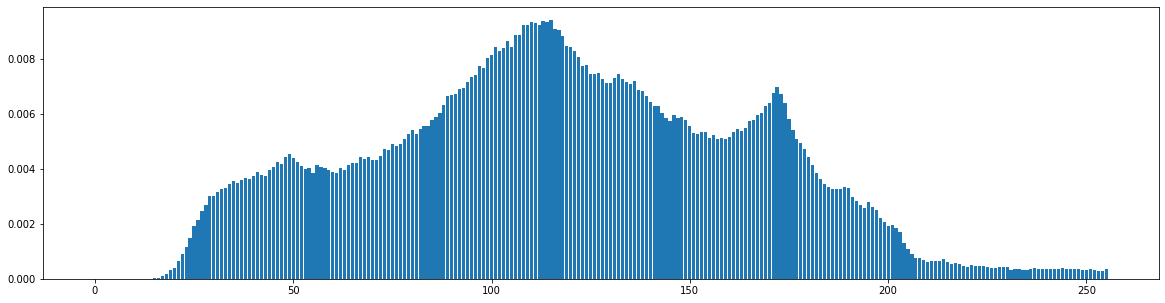

In [388]:
visualize_hist(hist_cv)

## Упражнение 4: Построение гистограммы

Реализуйте функцию для расчета гистограммы изображения.

In [389]:
def compute_hist(img):
    hist = np.zeros(256)
    h, w = img.shape
    for i in range(h):
      for j in range(w):
        hist[img[i, j]] += 1
    return hist

In [390]:
hist_my = compute_hist(img_gray)

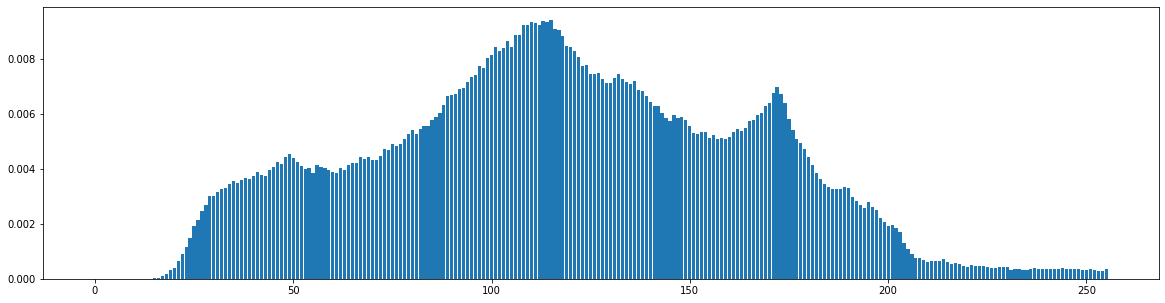

In [391]:
visualize_hist(hist_my)

In [392]:
assert((hist_my == hist_cv).all())

 ## Вопрос 3

 Что можно сказать об изображении по его гистограмме?

**Ответ: солнечная погода или пасмурно**

## Вопрос 4

Допустим, вы смотрите некоторый фильм и для текущего кадра выводите его гистограмму. Как будет меняться эта гистограмма с течением времени?

**Ответ: если обьект исчезает с кадра, то уменьшается количество цветов пикселей обьекта и увеличивается количество пикселей фона**

## Упражнение 5: JPEG и гистограмма

Исследуйте, как влияет степень сжатия алгоритма JPEG на вид гистограммы изображения.

In [393]:
cv2.imwrite('image_compressed.jpg', img_rgb, [cv2.IMWRITE_JPEG_QUALITY, 10])

True

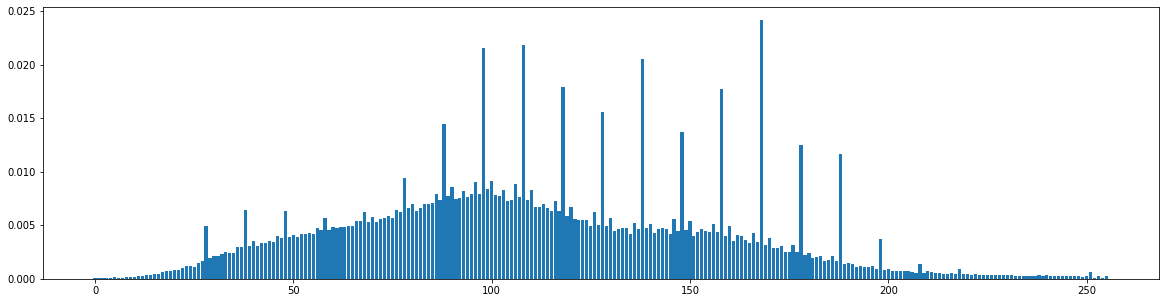

In [394]:
img_2 = cv2.imread('/content/image_compressed.jpg')
img_rgb_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)
img_gray_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)
hist_my_2 = compute_hist(img_gray_2)
visualize_hist(hist_my_2)

## Упражнение 6: Сегментация

На загруженном аэроортофотоплане выделите зеленые насаждения. Для этого постройте бинарную маску, где 1 будет отвечать наличию насаждений в данном пикселе, 0 - их отсутствию, и визуализируйте её. А также рассчитайте, какую долю изображения занимают зеленые насаждения. С какой ошибкой (погрешностью) получена эта величина?
**52.65 %**

Подсказка: вам должно помочь HSV пространство и гистограмма. Погрешность может быть оценена на глаз, по вашей неуверенности в определении порога отделения классов 'зеленые насаждения'/'прочее'.

In [395]:

def segment_green(img):
    
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    
    lower_green = np.array([20, 20, 20])
    upper_green = np.array([70, 255, 255])
    
    # Create a mask by thresholding the image
    mask = cv2.inRange(hsv, lower_green, upper_green)
    
    # Apply the mask to the original image
    segmented = cv2.bitwise_and(img, img, mask=mask)
    per = mask.sum()/(img.shape[0] * img.shape[1]) *100/255
    
    return segmented, mask, per

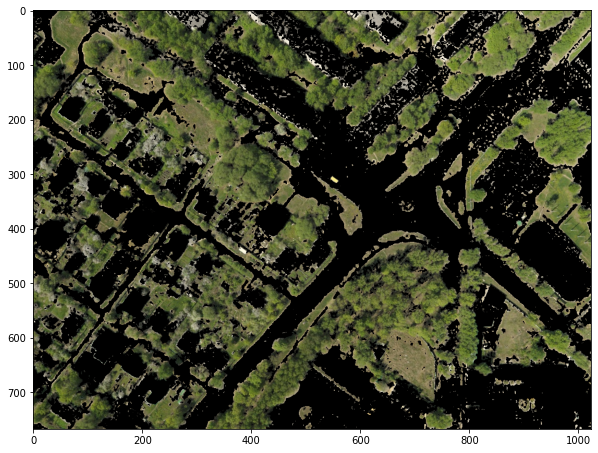

In [396]:
img_gr, mask, per = segment_green(img_rgb)
plt.figure(figsize=[10, 10])
plt.imshow(img_gr)

In [397]:
per

52.654520670572914

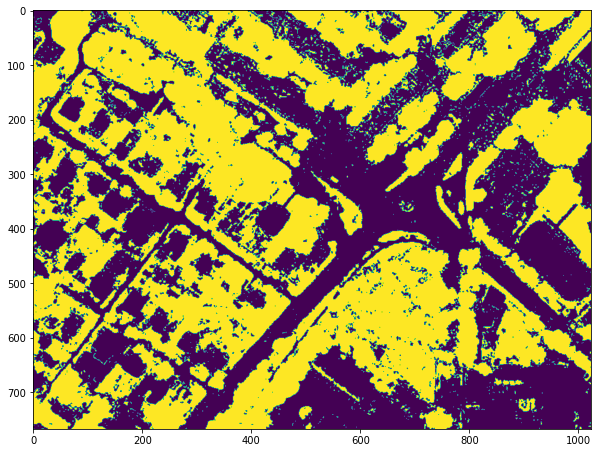

In [398]:
plt.figure(figsize=[10, 10])
plt.imshow(mask)

# Упражнение 7: Интегральное изображение
Напомним, что интегральным изображением называется следующая функция:
$$
    I(x, y) = \sum_{i = 0}^{x} \sum_{j = 0}^{y} f(i, j)
$$
С помощью интегрального изображения можно за $O(1)$ вычислять сумму интенсивностей в произвольной прямоугольной области. Требуется реализовать расчет интегрального изображения, а также быстрый расчет сумм интенсивностей в прямоугольнике заданном верхним левым углом, шириной и высотой $x, y, w, h$.

In [399]:
class IntegralImage:

    def __init__(self, image):
        height, width = image.shape[:2]
        self.integral = np.zeros((height, width), dtype=np.int32)
        
        for x in range(width):
            for y in range(height):
                self.integral[y, x] = image[y, x]
                if x > 0:
                    self.integral[y, x] += self.integral[y, x-1]
                if y > 0:
                    self.integral[y, x] += self.integral[y-1, x]
                if x > 0 and y > 0:
                    self.integral[y, x] -= self.integral[y-1, x-1]
     

    def sum(self, x, y, w, h):
        x1, y1 = x + w - 1, y + h - 1
        x2, y2 = x - 1, y - 1
        sum = self.integral[y1, x1]
        if x2 >= 0:
            sum -= self.integral[y1, x2]
        if y2 >= 0:
            sum -= self.integral[y2, x1]
        if x2 >= 0 and y2 >= 0:
            sum += self.integral[y2, x2]
        return sum



In [400]:
I = IntegralImage(img_gray)

In [401]:
x, y, w, h = 0, 0, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

x, y, w, h = 100, 100, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

## Вопрос 5

В каких задачах может потребоваться использовать интегральное изображение?

**Ответ:вычисление площади маски, средний цвет блока**

## Вопрос 6

Какому методу решения задачи в программировании следует метод расчета интегрального изображения?

**Ответ:динамическое программирование**